<a href="https://colab.research.google.com/github/IntroComputationalPhysics-UNT/kapitza-pendulum-dylanfranklin469/blob/main/franklin_kapitza_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Approach:**
- $\ddot{\theta}+2\gamma\dot{\theta}+[\frac{g}{l}-\frac{y_0}{l}\omega_d^2cos\omega_dt]sin\theta=0$
- Setting $\tau = \omega_dt$ to make terms dimensionless.
- $\frac{d^2\theta}{d\tau^2}+2\gamma(\frac{d\theta}{d\tau})+(\epsilon^2-\alpha cos\tau)sin\theta=0$
- $\zeta=\gamma/\omega_d$ represents a dimensionless dampening term.
- $\epsilon=\omega_0/\omega_d$ represents a dimensionless angular frequency term
- $\alpha = y_0/l$ represents the fractional displacement of the pivot point.
##**Predicted Behavior:**
1. **When driven hard enough:**
- Setting $\Omega=\frac{d}{d\tau}\theta$ we see the simple pendulum problem is $\frac{d}{d\tau}\Omega+2\zeta\Omega=0$, with the solution $\Omega=\Omega_0exp(-2\zeta\tau)$
- We expect $T_0=\frac{2\pi}{\epsilon}$, and the function's envelope to oscillate around $\theta=\pi$ for our solution. There should be a value of $\epsilon$, where we have a solution over the threshold.
****
So, we want to find the correct parameters to effectively make our problem act like this.

##**Determining Long-timescale Behavior**
- We will take a time average at a far away chunk, as the function should converge to an angle, and $\pi$ is our target.
- For ease, we can plot our data as $cos\theta$ rather than $\theta$, as our target($\pi$) will just be 1 for $cos\theta$.
* **How we do the time averaging**
1. Knowing our upper limit for $\tau$ is $\frac{n_{decay}}{2\zeta}$, we can make an array representing this data, $\tau_{avg} = np.linspace(\frac{n_{decay}-1}{2\zeta},\frac{n_{decay}}{2*\zeta})$.
2. Next, we take the average of the solution within the range of this $\tau_{avg}$ array.

##**Pseudocode**
1. **Import modules:** `math`, `numpy`, `solve_ivp` from `scipy.integrate`, `pyplot` and `animate` from `matplotlib`
2. **Define equation of motion:** $\ddot{\theta}+2\zeta\dot{\theta}+(\epsilon^2-\alpha cos\tau)sin\theta=0 $ Moving to the other side,  $\ddot{\theta}=-2\zeta\dot{\theta}-(\epsilon^2-\alpha cos\tau)sin\theta $
**Note:** $f'=\frac{df}{d\tau}$ with $\tau=\omega_d t$, a dimensionless time.
3. **Define utilities:**
- **`basic_plot`**

4. **Define mathmatical functions:**

- **`alpha_critial`:** our guess for the boundary of the inverted state. Parameters are `epsilon`, `zeta`, `coef`; returns `alpha.
- **`average_long_timescale_response`:** Returns long-timescale information, and solution to ODE.
- **`pendulumODE`:** sets up differential equation to use with `solve_ivp`

##Modules

In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

##Functions

In [3]:
def pendulumODE(tau, y, epsilon, alpha, zeta):
  """
  Inputs
  tau: {float} dimensionless time
  y: {ndarray} state variable
  alpha: {float} relative displacement of the pivot to the pendulum arm. alpha= y_0/l
  epsilon: {float} dimensionless frequency. epsilon = omega_0/omega_d
  zeta: {float} dimensionless dampening

  Returns:
  dy_dtau: {ndarray} time derivative of state variables
  """
  theta, ang_vel = y #unpack state variables
  dtheta_dtau = ang_vel #first derivative
  d2theta_dtau2 = -2 * zeta * dtheta_dtau -(epsilon**2 - (alpha * np.cos(tau))) * np.sin(theta) #second derivative
  dy_dtau=np.array([dtheta_dtau,d2theta_dtau2]) #derivative of the state variable
  return dy_dtau
#utilities
def piplot(x,y,xlabel=None,ylabel=None,figsize=(3,3)): #plotting utility
  """
  Inputs:
    x -       domain
    y -       range
    ylabel - title for y axis
    figsize - size of the graph
  Returns:
    Matplotlib Graph
  """
  plt.figure(figsize=figsize)
  plt.plot(x,y)
  plt.ylim(-np.pi*1.1,np.pi*1.1)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.axhline(3.1415,color='red',linestyle=':')
  return plt.show()
def alpha_critical(epsilon,zeta,coef):
    """
    Inputs:
    zeta: {float} dimensionless dampening
    coef : {float} tuning parameter to help with the fit
    epsilon: {float} dimensionless frequency. epsilon = omega_0/omega_d


    Returns:
    alpha: {float} relative displacement of the pivot to the pendulum arm. alpha= y_0/l

    """
    #alpha = coef* epsilon **2 #our (unjustified) guess; omits zeta
    alpha = coef* epsilon #our (unjustified) guess; omits zeta

    return alpha
def average_long_timescale_response(epsilon,alpha,zeta,n_decay=100,delta_theta=0.01):
  """
  Inputs:
  epsilon: {float} relative displacement of the pivot to the pendulum arm. alpha= y_0/l
  alpha: {float} relative displacement of the pivot to the pendulum arm. alpha= y_0/l
  zeta: {float} dimensionless dampening
  n_decay: {float} number of times a decay period occurs
  delta_theta: {float} small float to make theta initially occur just below pi.

  Returns:
  cos_theta_averaging: {ndarray} contains averaging information. 1 is the target, being pi.
  solution: {ndarray}: solution to the differential equation "pendulumODE"
  """
  tau_min = 0 #starting tau value
  tau_max = n_decay/(2*zeta)  #maximum tau value
  tau_span = [tau_min, tau_max] #dimensionless time span
  theta_0 = np.pi - delta_theta #initial angle
  ang_vel_0 = 0  #initial angular velocity
  y_0 = [theta_0,ang_vel_0] #initalizing conditions
  solution = solve_ivp(pendulumODE,
                      tau_span, y_0, args=(epsilon, alpha, zeta),
                      method = 'Radau', dense_output = True)

  tau_averaging_range = np.linspace(((n_decay-1)/(2*zeta)),(n_decay /(2*zeta)), 1000) #array with positions in determined long time zone
  cos_theta_averaging = np.mean(np.cos(solution.sol(tau_averaging_range)[0]))         #mean of solutions with positions determined in tau_averaging_range
  return cos_theta_averaging, solution


##Visualizing cos$\theta$ vs $\tau$ given $\tau,\alpha$, and $\zeta$.

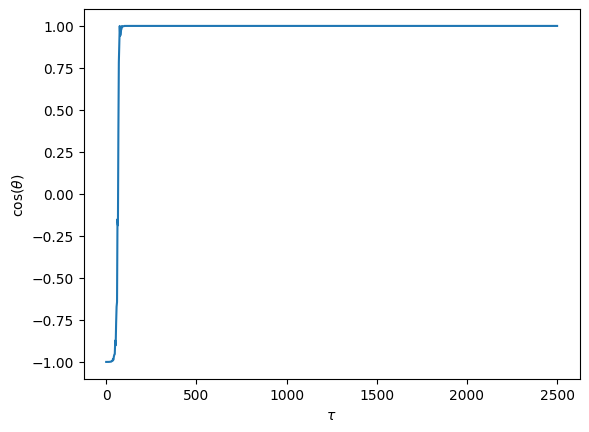

In [13]:
epsilon = .2
alpha = .2
zeta = .1
delta_theta = 0.01 #deviation of theta from pi
n_decay = 500


#define span of tau
tau_min = 0 #starting tau value
tau_max = n_decay/(2*zeta) #maximum tau value
tau_span=[tau_min,tau_max] #dimensionless time span

theta_0 = np.pi- delta_theta #initial value
ang_vel_0 = 0 #initial angular velocity
y_0 = [theta_0,ang_vel_0] #initializing conditions
solution = solve_ivp(pendulumODE,
                      tau_span, y_0, args=(epsilon, alpha, zeta),
                      method = 'Radau', dense_output = True)
tau_plot = np.linspace(tau_min,tau_max,1000) #array of tau vlaues
theta_plot = solution.sol(tau_plot)[0] #computing theta over tau values
plt.plot(tau_plot,np.cos(theta_plot)) #plotting tau vs cos(theta)
plt.xlabel(r'$\tau$')
plt.ylabel(r'cos($\theta$)')

plt.show()

#Parameter sweep over $(\epsilon,\alpha)$ over $\zeta=.1$
$\alpha$,$\epsilon$,$\zeta$  |  $\theta\rightarrow\infty$

- .4 .2 .1| 1  
- .3 .2 .1| 1  
- .2 .2 .1| 1  
- .2 .1 .1| 1  
- .5 .2 .1| 1
-  1 .2 .1| 1
- .2 .4 .1| 0
- .62 .38 .1| Not A Constant


## 2D plot ($\alpha$ vs $\epsilon$)

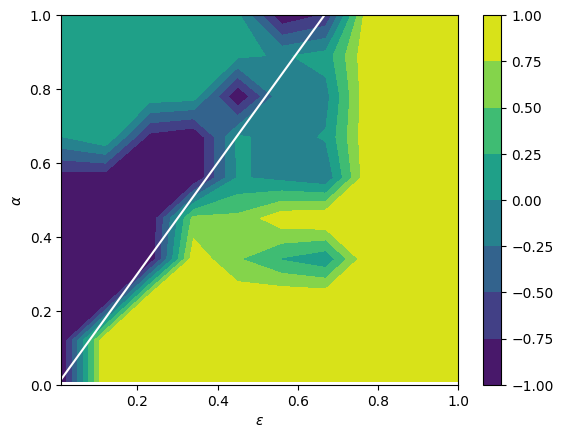

In [59]:
epsilon_list = np.linspace(0.01,1,10) #list of all epsilon values
alpha_list = np.linspace(0.01,1,10) #list of all alpha values
zeta=0.1
n_decay = 500 #number of decay periods

cos_theta_mesh = np.zeros((len(alpha_list),len(epsilon_list))) #make mesh square
for i, alpha in enumerate(alpha_list):
  for j, epsilon in enumerate(epsilon_list):
    cos_theta_averaging, solution = average_long_timescale_response(epsilon,alpha,zeta,n_decay=n_decay)
    cos_theta_mesh[i,j]=cos_theta_averaging #create mesh
plt.contourf(epsilon_list,alpha_list,cos_theta_mesh) #plot contour of mesh
plt.xlabel(r'$\epsilon$')
plt.ylabel(r'$\alpha$')
plt.ylim(0,1) #ensure fitting of plot
plt.plot(epsilon_list,alpha_critical(epsilon_list,zeta,coef=1.5),color='white') #plot alpha critical line
plt.colorbar() #show color legend
plt.show()



#**Summary:**
1. Stability Critereon:
- To determine stability I looked for results where the funcion converges to $\theta=\pi$. This was done by taking a time average. I had explained this in `Determining Long Scale Behavior` section above, but we created an array (`tau_averaging_range`) to capture the solution at the end of the $\tau$ range. Taking the mean of this interval using arrays for epsilon and alpha allows us to plot the average $cos\theta$ value for each parameter.
2. How I chose numerical parameters:
- I chose tau_max by dividing a variable able to be changed by $(2*\zeta)$ because
- I used 0.01 for delta_theta, as this value allows our function to initially begin near $\pi$, while ensuring $\theta_0$ being $\pi$ isn't skewing our analysis.
- For $\alpha$ and $\epsilon$, I chose values up to 1, as these parameters allowed for an accurate mesh, while saving on computational resources.
3. Boundary:
- $\alpha(\epsilon) = \epsilon * 1.5$  seems to fit as the boundary function. My guess originally contained $\epsilon^2$, but it did not seem to fit as well.